# Association Rules applied in Movie database

This notebook walks through some fun analysis on The Movie Database (TMDb). The dataset is available on kaggle dataset. You can find the here [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata/home). 


Association rules analysis is frequently found in market reserach. In this dataset, association rule is applied to find the relationship of different **genres** for movies. In the movie dataset, generes for every movie is provided. 

The second application is to find the **cooperation of actors and actresses**. We would like to find pattern beween movie cooperations. 

All the results are visualized by networkx package. The function was written when I did internship at Autodesk.The drawnetwork function is just normal. 

**Motivation**

I love network. A lot of interactions happen around us everyday and it is really cool to visualiza them by graph.

Ok. Let's get started! Have fun!

## Part 0. Prepare

In [37]:
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
credit=pd.read_csv('tmdb_5000_credits.csv')
movie=pd.read_csv('tmdb_5000_movies.csv')

movie.drop(['homepage','tagline'],axis=1,inplace=True)
movie.dropna(inplace=True)

## Part 1. Genres Analysis

In [8]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 18 columns):
budget                  4799 non-null int64
genres                  4799 non-null object
id                      4799 non-null int64
keywords                4799 non-null object
original_language       4799 non-null object
original_title          4799 non-null object
overview                4799 non-null object
popularity              4799 non-null float64
production_companies    4799 non-null object
production_countries    4799 non-null object
release_date            4799 non-null object
revenue                 4799 non-null int64
runtime                 4799 non-null float64
spoken_languages        4799 non-null object
status                  4799 non-null object
title                   4799 non-null object
vote_average            4799 non-null float64
vote_count              4799 non-null int64
dtypes: float64(3), int64(4), object(11)
memory usage: 712.4+ KB


### Data Manipulation

- Read genres in json format and convert to the data structure that Python can handle
- Append all the genres in one list for each movie

In [22]:
import json
movie['genres']=movie.genres.apply(lambda x: json.loads(x))

def convertList(inputList):
    ge=[]
    for dic in inputList:
        ge.append(dic['name'])
    return ge

def getFirst(inputList):
    if len(inputList)==0:
        return np.NaN
    else:
        return inputList[0]

In [ ]:
movie.genres.apply(lambda x: convertList(x)).head()

- Remove movies with empty genre list
- Convert columns with list to several columns with binary info

       Ex: for the first movie, its genres is [Action, Adventure, Fantasy, Science Fiction], then we create three corresponding columns to represent them and set its value as 1.

In [40]:
g=pd.DataFrame(movie.genres.apply(lambda x: convertList(x)))
g=g[g.genres.apply(len)!=0]

In [41]:
for index, row in g.iterrows():
    for item in row['genres']:
        g.at[index,item]=1
g=g.fillna(0)

In [43]:
g.head()

genres  Action  Adventure  Fantasy  Science Fiction  Crime  Drama  Thriller  Animation  Family  Western  Comedy  Romance  Horror  Mystery  History  War  Music  Documentary  Foreign  TV Movie
0  [Action, Adventure, Fantasy, Science Fiction]     1.0        1.0      1.0              1.0    0.0    0.0       0.0        0.0     0.0      0.0     0.0      0.0     0.0      0.0      0.0  0.0    0.0          0.0      0.0       0.0
1                   [Adventure, Fantasy, Action]     1.0        1.0      1.0              0.0    0.0    0.0       0.0        0.0     0.0      0.0     0.0      0.0     0.0      0.0      0.0  0.0    0.0          0.0      0.0       0.0
2                     [Action, Adventure, Crime]     1.0        1.0      0.0              0.0    1.0    0.0       0.0        0.0     0.0      0.0     0.0      0.0     0.0      0.0      0.0  0.0    0.0          0.0      0.0       0.0
3               [Action, Crime, Drama, Thriller]     1.0        0.0      0.0              0.0    1.0    1.0       1.0        0.0     0.0      0.0     0.0      0.0     0.0      0.0      0.0  0.0    0.0          0.0      0.0       0.0
4           [Action, Adventure, Science Fiction]     1.0        1.0      0.0              1.0    0.0    0.0       0.0        0.0     0.0      0.0     0.0      0.0     0.0      0.0      0.0  0.0    0.0          0.0      0.0       0.0

### Apply Assciation rules

The details of association rules is skipped. 

In [54]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(g.drop('genres',axis=1), min_support=0.02, use_colnames=True)

In [101]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules=rules[(rules['antecedents'].apply(len)==1)&(rules['consequents'].apply(len)==1)]
rules.sort_values('confidence',ascending=False).head()

antecedents consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction
35    (History)     (Drama)            0.041282            0.481140  0.036672    0.888325  1.846292  0.016810    4.646156
44  (Animation)    (Family)            0.049036            0.107502  0.040863    0.833333  7.751787  0.035592    5.354987
36        (War)     (Drama)            0.030176            0.481140  0.024728    0.819444  1.703131  0.010209    2.873686
42    (Mystery)  (Thriller)            0.072925            0.266974  0.050712    0.695402  2.604756  0.031243    2.406538
31    (Romance)     (Drama)            0.187343            0.481140  0.126362    0.674497  1.401872  0.036224    1.594024

**Important interpretation**

It is ok if you do not understand association rules. I can explain the results above in very plain language. 

The rules dataset can be translated as : 

   - history genre movie has 0.041 probability(antecedent support) to appear and drama genre movie has 0.48 probability(consequent support) to appear. Moreover, when the movie is history type, it has 88.83% probability(confidence) to be a drama movie as well. That should make sense. Other rules can be interpreted in a similary way.
   - The higher the confidence of the rules, the closer relationship between two genres.

### NetworkX Visualizes the rules

In [99]:
import networkx as nx

def drawNetwork(ant2):
    G1 = nx.DiGraph()

    for index, row in ant2.iterrows():
        #add node
        G1.add_node(list(row['antecedents'])[0],weight=round(row['antecedent support'],3))
        #add node
        G1.add_node(list(row['consequents'])[0],weight=round(row['consequent support'],3))
        #add edge
        G1.add_edge(list(row['antecedents'])[0],list(row['consequents'])[0],
                   weight=round(row['confidence'],3))
    #G=nx.from_pandas_edgelist(ant2, 'antecedants', 'consequents', ['confidence'])
    f, ax = plt.subplots(figsize=(20,20))

    #plt.figure(figsize=(20,20))
    pos = nx.spring_layout(G1)
    #nx.draw_networkx_edges(G1, pos, arrows=True)
    #nx.draw(G1,pos=pos,with_labels = True,arrows=True)
    #nx.draw_networkx_edges(G1,pos)
    edges=G1.edges()
    #colors = [G[u][v]['color'] for u,v in edges]
    #weights = [G[u][v]['weight'] for u,v in edges]
    labels = nx.get_edge_attributes(G1,'weight')
    node_weight=[150*nx.get_node_attributes(G1,'weight')[key] for key in G1.nodes]
    val_map=nx.get_node_attributes(G1,'weight')
    values= [10000*val_map.get(node, 0.25) for node in G1.nodes()]

    #nx.draw(G1, cmap=plt.get_cmap('jet'), node_color=values)
    nx.draw_networkx_nodes(G1, pos, cmap=plt.get_cmap('jet'),
                           node_size = values,node_color='orange',alpha=0.6,ax=ax)
    nx.draw_networkx_labels(G1, pos,ax=ax,fontsize=14)
    #nx.draw_networkx_edges(G1, pos, edgelist=G1.edges(), arrows=True)
    nx.draw_networkx_edges(G1, pos,edgelist=edges, edge_color='lightskyblue', arrows=True,ax=ax)
    #nx.draw_networkx_edge_labels(G1,pos,edge_labels=labels,ax=ax)

    #sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('jet'))
    #sm._A = []
    #plt.colorbar(sm)
    return f

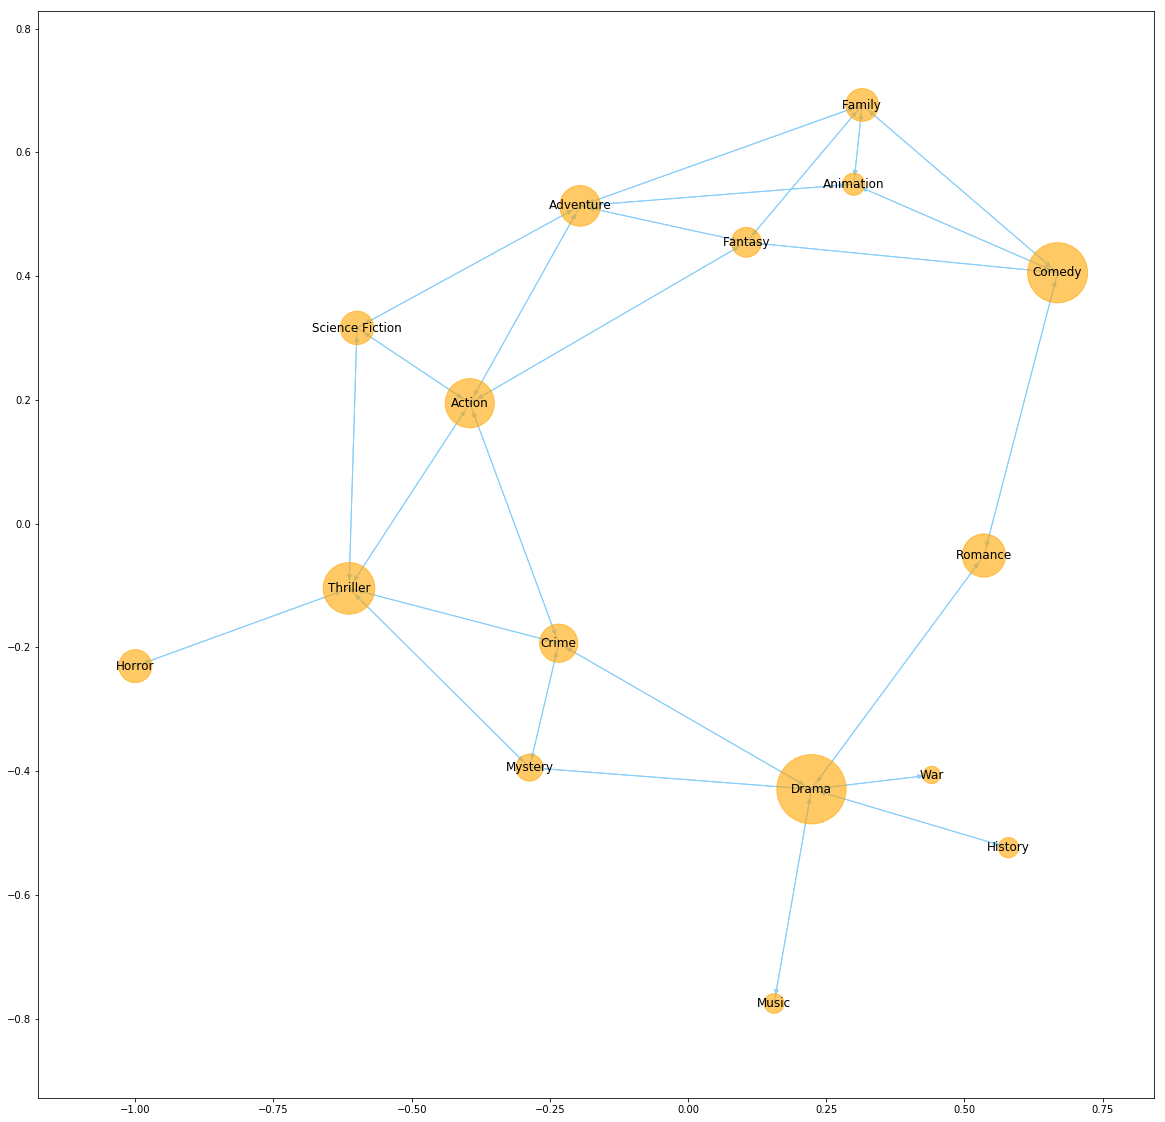

In [100]:
drawNetwork(rules);

### Conclusion

1. drama, comedy, thriller, action seem to be top four popuolar genres in movie history (by their size/antecedent support/confidence support). They can also be interpreted as a general type because almost all the edges are inward. We can also find the types connected is more specific. 
2. For the family movie, it can also be adventure, animation and comedy. Apparantly, thriller movies are not suitable for a family. 
3. The result is reasonable based on our life experience

to be continued...

## Part 2. Actor/Actresses

From Credit dataset, we can obtain all the names of actresses and actors for each movie. We decide to extract them to see the preference of cooperation of each actor/actresses.

### Data Manipulation and Rules are similarly implemented

In [105]:
credit['cast']=credit.cast.apply(lambda x: json.loads(x))

def convertList(inputList):
    ge=[]
    for dic in inputList:
        ge.append(dic['name'])
    return ge

def getFirst(inputList):
    if len(inputList)==0:
        return np.NaN
    else:
        return inputList[0]

In [124]:
cast=pd.DataFrame(credit.cast.apply(lambda x: convertList(x)))
cast=cast[cast.cast.apply(len)!=0]

In [125]:
cast.head()

cast
0  [Sam Worthington, Zoe Saldana, Sigourney Weave...
1  [Johnny Depp, Orlando Bloom, Keira Knightley, ...
2  [Daniel Craig, Christoph Waltz, Léa Seydoux, R...
3  [Christian Bale, Michael Caine, Gary Oldman, A...
4  [Taylor Kitsch, Lynn Collins, Samantha Morton,...

In [126]:
for index, row in cast.iterrows():
    i=0
    for item in row['cast']:
        if i<5:
            cast.at[index,item]=1
        else:
            break
        i=i+1
cast=cast.fillna(0)

the conversion takes a longer time to process due to too many new columns to create. The cast dataframe will be high-dimensional. We early stop the rules serach.

In [127]:
cast.shape

(4760, 9391)

In [132]:
frequent_itemsets = apriori(cast.drop('cast',axis=1), min_support=0.0001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules=rules[(rules['antecedents'].apply(len)==1)&(rules['consequents'].apply(len)==1)]
rules.sort_values('confidence',ascending=False).head()

KeyboardInterrupt: 

In [136]:
rules.sort_values('confidence',ascending=False).head()

antecedents        consequents  antecedent support  consequent support   support  confidence        lift  leverage  conviction
35     (James Doohan)  (DeForest Kelley)            0.001471            0.001471  0.001471    1.000000  680.000000  0.001468         inf
34  (DeForest Kelley)     (James Doohan)            0.001471            0.001471  0.001471    1.000000  680.000000  0.001468         inf
16     (George Takei)    (Leonard Nimoy)            0.001471            0.001681  0.001261    0.857143  510.000000  0.001258    6.988235
33     (James Doohan)     (George Takei)            0.001471            0.001471  0.001261    0.857143  582.857143  0.001258    6.989706
32     (George Takei)     (James Doohan)            0.001471            0.001471  0.001261    0.857143  582.857143  0.001258    6.989706

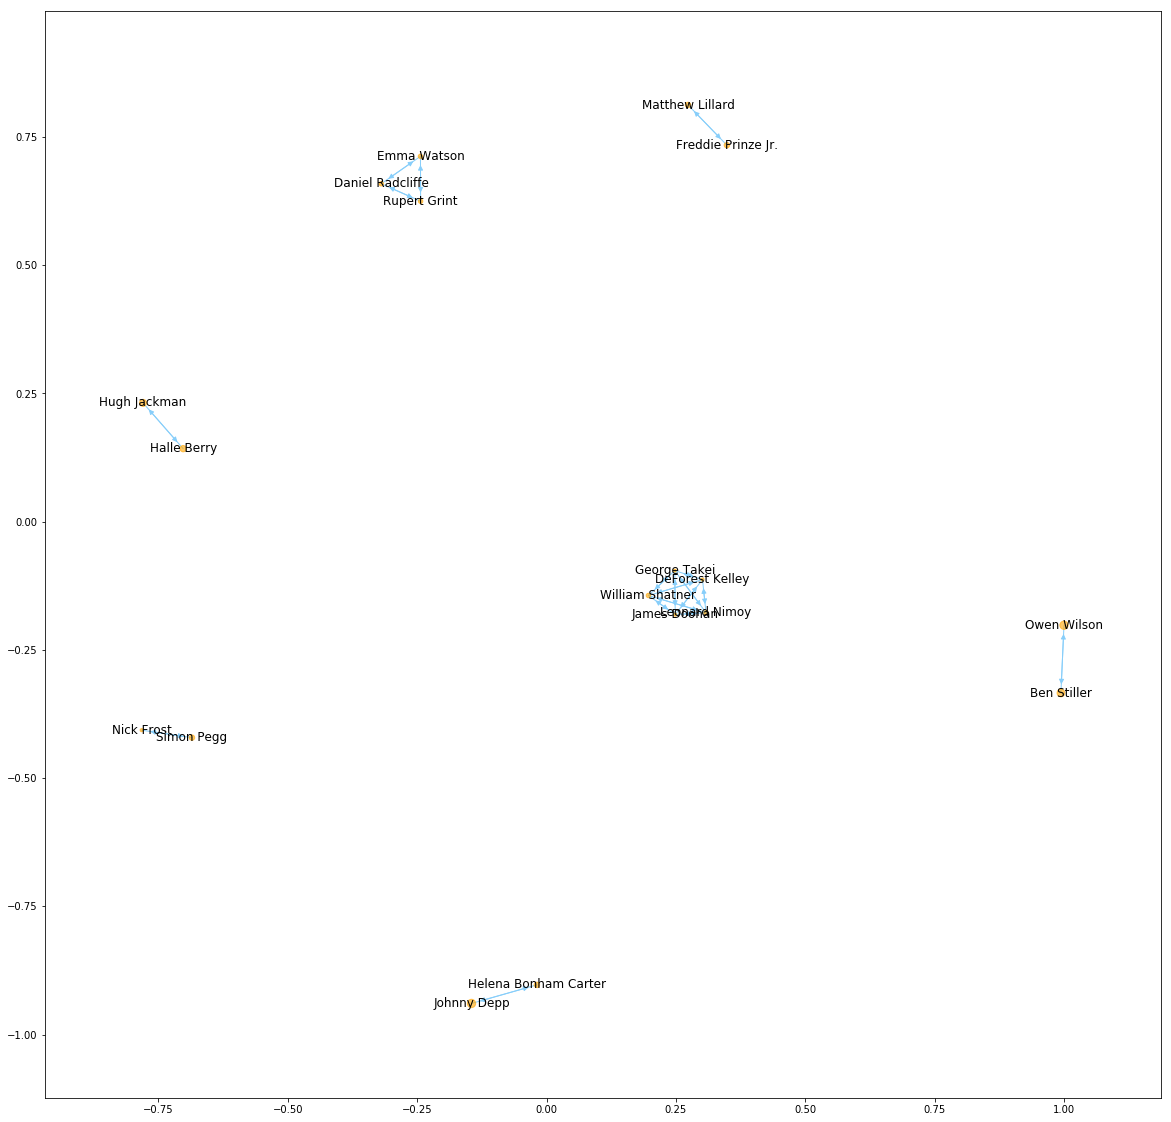

In [138]:
drawNetwork(rules);

Seems like the association rules do not work well here. 

## Conclusion

1. It would be better to join two tables at the very beginning. We would do it next time
2. Analysis beyong network can be various too. Let's expect the next time analysis.